In [7]:
import bt
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
from matplotlib import rcParams
rcParams['font.family'] = 'SimHei'
%matplotlib inline

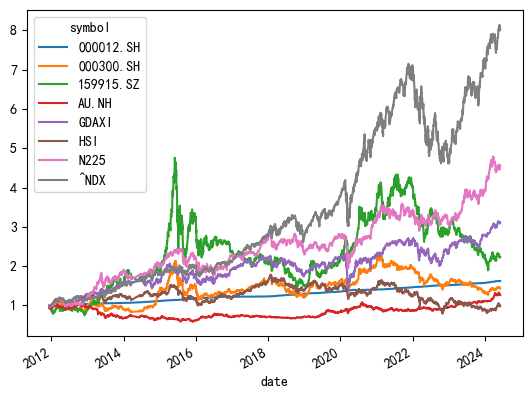

In [8]:
from datafeed.dataloader import CSVDataloader
data = CSVDataloader.get(['000300.SH', #沪深300
                          '159915.SZ', #创业板
                          'HSI', #香港恒生
                          '^NDX',# 纳指100
                          'GDAXI',#德国DAX
                          'N225',#日经225
                          'AU.NH',#南华黄金期货指数
                          #'SC.NH',#南华 原油期货指数
                          '000012.SH',#国债指数
                         ])
data.dropna(inplace=True)
(data.pct_change()+1).cumprod().plot()
plt.show()

In [9]:
(data.pct_change()+1).corr()

symbol,000012.SH,000300.SH,159915.SZ,AU.NH,GDAXI,HSI,N225,^NDX
symbol,,,,,,,,
000012.SH,1.000000,-0.016378,-0.037150,-0.017560,0.013001,-0.016480,0.017627,-0.018509
000300.SH,-0.016378,1.000000,0.729984,0.023381,0.186938,0.583332,0.302504,0.167568
159915.SZ,-0.037150,0.729984,1.000000,0.024050,0.131045,0.379656,0.196534,0.132302
AU.NH,-0.017560,0.023381,0.024050,1.000000,-0.016092,-0.003049,-0.105492,0.012758
GDAXI,0.013001,0.186938,0.131045,-0.016092,1.000000,0.384529,0.354597,0.509122
HSI,-0.016480,0.583332,0.379656,-0.003049,0.384529,1.000000,0.491528,0.235340
N225,0.017627,0.302504,0.196534,-0.105492,0.354597,0.491528,1.000000,0.188386
^NDX,-0.018509,0.167568,0.132302,0.012758,0.509122,0.235340,0.188386,1.000000


In [10]:
import bt
s = bt.Strategy('全球大类资-风险平价-月度再平衡', [
                            bt.algos.RunAfterDays(
                            20*6 + 1
                        ),
                       bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighERC(),
                       bt.algos.Rebalance()])
test = bt.Backtest(s, data)
stras = [test]

In [11]:
for bench in ['000300.SH']:
    data = CSVDataloader.get([bench])
    s = bt.Strategy(bench, [bt.algos.RunOnce(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])
    stra = bt.Backtest(s, data)
    stras.append(stra)
    
res = bt.run(*stras)

100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


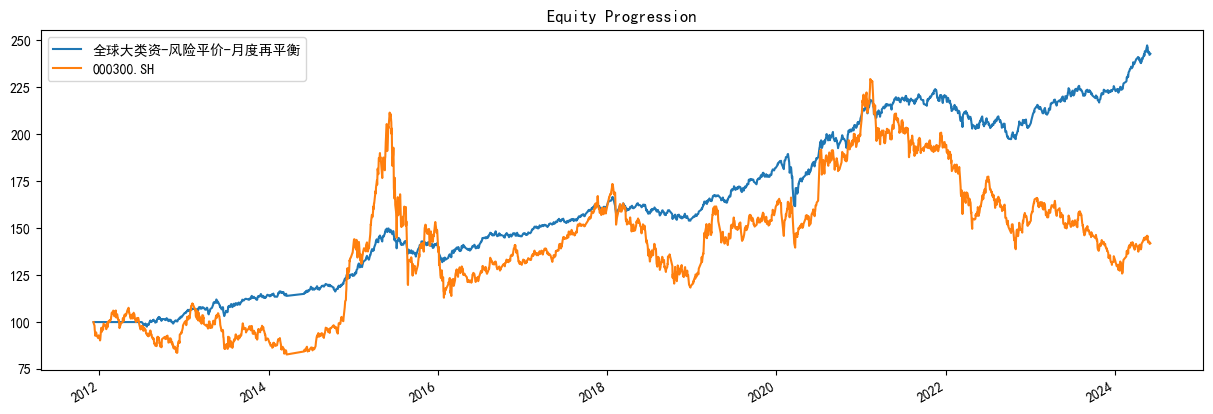

In [12]:
res.plot()
plt.show()

In [13]:
res.stats

,全球大类资-风险平价-月度再平衡,000300.SH
start,2011-12-08 00:00:00,2011-12-08 00:00:00
end,2024-06-03 00:00:00,2024-06-03 00:00:00
rf,0.0,0.0
total_return,1.428768,0.41948
cagr,0.073649,0.028449
max_drawdown,-0.146584,-0.466015
calmar,0.502432,0.061047
mtd,0.001944,0.002457
three_month,0.042648,0.014356
six_month,0.086743,0.030302
